<a href="https://colab.research.google.com/github/PrimaVandayani/DATA-ANALYTICS/blob/PrimaVandayani-patch-2/UAS_Data_Analytic_Almer_Ezra_Devara_202241001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A.Identifikasi Masalah


*   Ho : Tidak ada pengaruh yang signifikan antara pendidikan dengan level upah
*   Ha : Ada pengaruh yang signifikan tingkat pendidikan wine dengan level upah





B. Pengumpulan dan review data

*   Import library
*   Import data
*   Baca 5 data teratas
*   Informasi data
*   Pemilihan 2 variabel













In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

data_excel=pd.read_excel('Data Mentah.xlsx')

data_excel.head()

,KodePendidikan,TahunBergabung,MasaKerja,KodeKota,Level Upah,Usia,KodeGender,PengalamanKerja,Keinginan Untuk Keluar
0,3,2017,6,1,3,34,1,0,0
1,3,2013,10,2,1,28,2,3,1
2,3,2014,9,3,3,38,2,2,0
3,2,2016,7,1,3,27,1,5,1
4,2,2017,6,2,3,24,1,2,1


In [ ]:
data_excel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   KodePendidikan          4653 non-null   int64
 1   TahunBergabung          4653 non-null   int64
 2   MasaKerja               4653 non-null   int64
 3   KodeKota                4653 non-null   int64
 4   Level Upah              4653 non-null   int64
 5   Usia                    4653 non-null   int64
 6   KodeGender              4653 non-null   int64
 7   PengalamanKerja         4653 non-null   int64
 8   Keinginan Untuk Keluar  4653 non-null   int64
dtypes: int64(9)
memory usage: 327.3 KB


In [ ]:
data_hipo=data_excel[['KodePendidikan','Level Upah']]
data_hipo

,KodePendidikan,Level Upah
0,3,3
1,3,1
2,3,3
3,2,3
4,2,3
...,...,...
4648,3,3
4649,2,2
4650,2,3
4651,3,3


In [ ]:
data_hipo.isna().sum().sum()

0

Tidak ditemukan data kosong

<Axes: xlabel='KodePendidikan'>

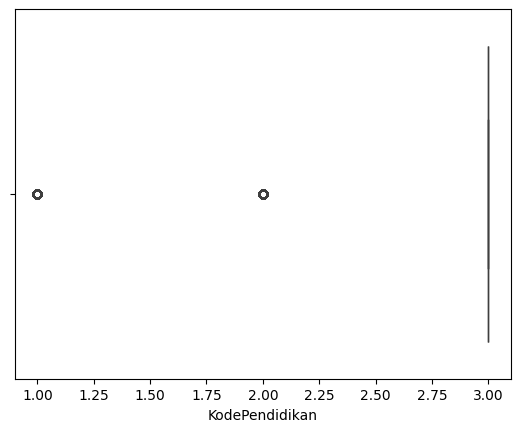

In [ ]:
sns.boxplot(x='KodePendidikan',data=data_hipo)

<Axes: xlabel='Level Upah'>

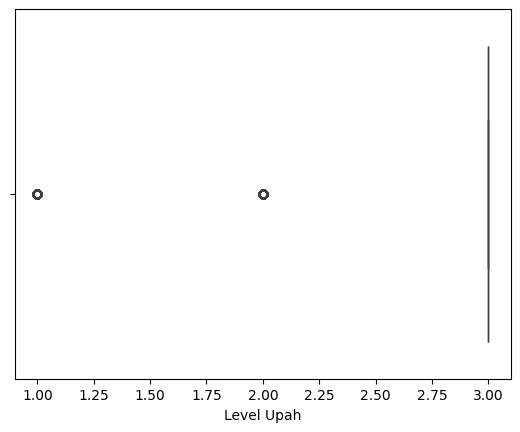

In [ ]:
sns.boxplot(x='Level Upah',data=data_hipo)

<Axes: ylabel='Frequency'>

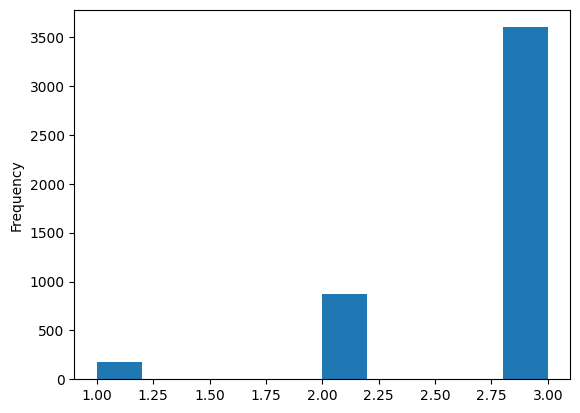

In [ ]:
data_hipo['KodePendidikan'].plot(kind='hist')

<Axes: ylabel='Frequency'>

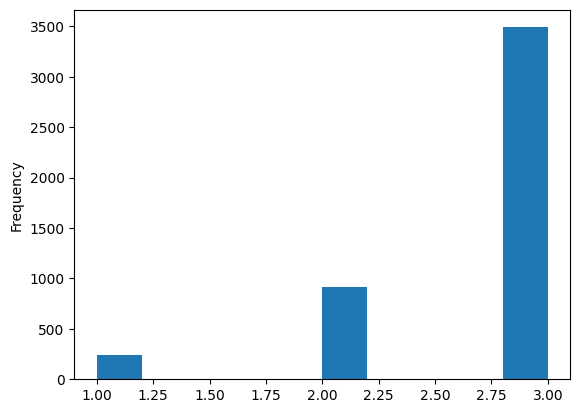

In [ ]:
data_hipo['Level Upah'].plot(kind='hist')

<Axes: xlabel='KodePendidikan', ylabel='Density'>

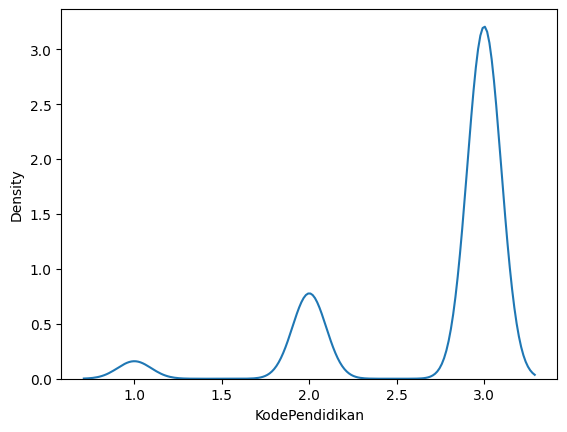

In [ ]:
sns.kdeplot(data_hipo['KodePendidikan'])

<Axes: xlabel='Level Upah', ylabel='Density'>

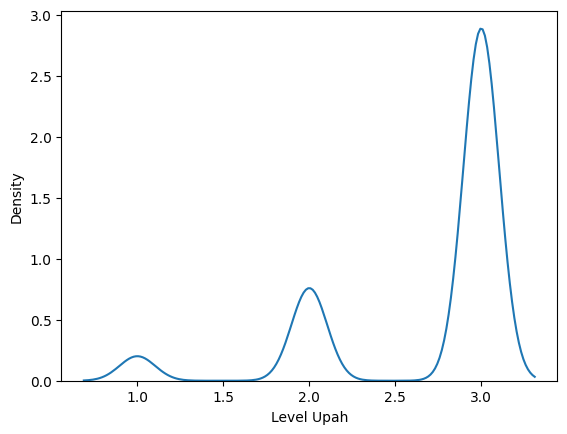

In [ ]:
sns.kdeplot(data_hipo['Level Upah'])

<ipython-input-14-fc7643a65f3e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data_hipo,color='red',shade=True)


<Axes: ylabel='Density'>

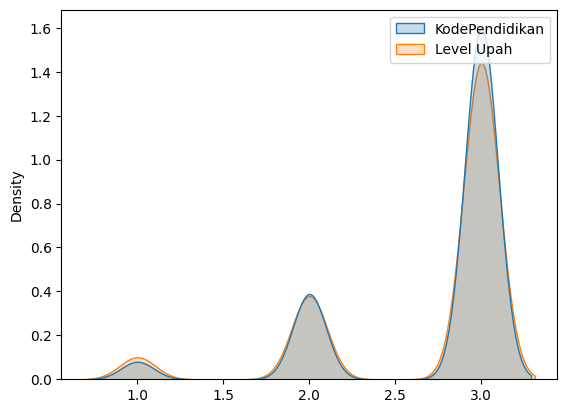

In [ ]:
sns.kdeplot(data_hipo,color='red',shade=True)

In [ ]:
data_hipo.describe()

,KodePendidikan,Level Upah
count,4653.00000,4653.000000
mean,2.73544,2.698259
std,0.52112,0.561435
min,1.00000,1.000000
25%,3.00000,3.000000
50%,3.00000,3.000000
75%,3.00000,3.000000
max,3.00000,3.000000


In [ ]:
varians=data_hipo['KodePendidikan'].var()
varians

0.2715662137187539

In [ ]:
kurtosis1=data_hipo['KodePendidikan'].kurtosis()
skewness1=data_hipo['KodePendidikan'].skew()
varians1=data_hipo['KodePendidikan'].var()
print('Kurtosis dari KodePendidikan=',kurtosis1)
print('Skewness dari KodePendidikan=',skewness1)
print('Varians dari KodePendidikan=',varians1)

Kurtosis dari KodePendidikan= 2.5336266979348565
Skewness dari KodePendidikan= -1.8480958339585485
Varians dari KodePendidikan= 0.2715662137187539


In [ ]:
kurtosis2=data_hipo['Level Upah'].kurtosis()
skewness2=data_hipo['Level Upah'].skew()
varians2=data_hipo['Level Upah'].var()
print('Kurtosis dari Level Upah=',kurtosis2)
print('Skewness dari Level Upah=',skewness2)
print('Varians dari Level Upah=',varians2)

Kurtosis dari Level Upah= 1.912202566077493
Skewness dari Level Upah= -1.7095313463725095
Varians dari Level Upah= 0.31520978061473115


Kesimpulan: Pendidikan
  Berdasarkan mean yang telah ditemukan , variabel pendidikan memiliki nilai 2.73544, dengan nilai tengah 3, (mean < median) yang menunjukkan data condong ke kiri, dibuktikan dengan nilai skweness yang negatif
  Kurtosis yang lebih kecil dari 3 menunjukkan kurva berbentuk landai yang disebut dengan platikurtis

Kesimpulan: Level upah
  Berdasarkan mean yang telah dicari, variabel Upah memiliki nilai, 2.698259, dengan nilai tengah, 3.
  Kurtosis yang lebih kecil dari 3 menunjukkan bentuk kurva landai (Platikurtis)

<Axes: >

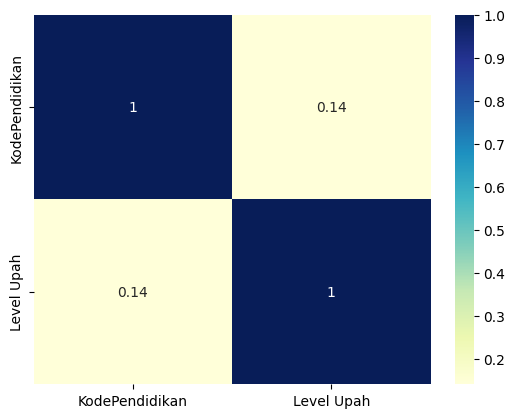

In [ ]:
sns.heatmap(data_hipo.corr(),annot=True,cmap='YlGnBu')

Kesimpulan

1.   Terdapat hubunan antar pendidikan dengan level upah
2.   Kekuataan hubungan kedua variabel tergolong sangat rendah dengan nilai 0.14
3.   Hubungan yang bernilai positif menunjukkan arah yang positif dimana semakin tinggi jenjang pendidikan yang ditempuh, maka akan semakin tinggi juga upah yang didapatkan. Begitupun sebaliknya



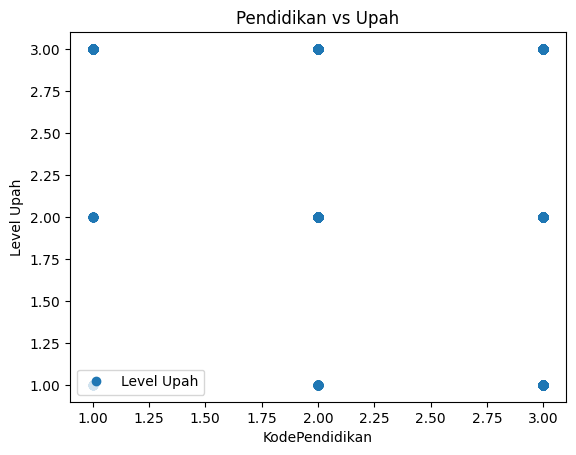

In [ ]:
data_hipo.plot(x='KodePendidikan', y='Level Upah', style='o')
plt.title('Pendidikan vs Upah')
plt.xlabel('KodePendidikan')
plt.ylabel('Level Upah')
plt.show()

<Axes: xlabel='KodePendidikan', ylabel='Level Upah'>

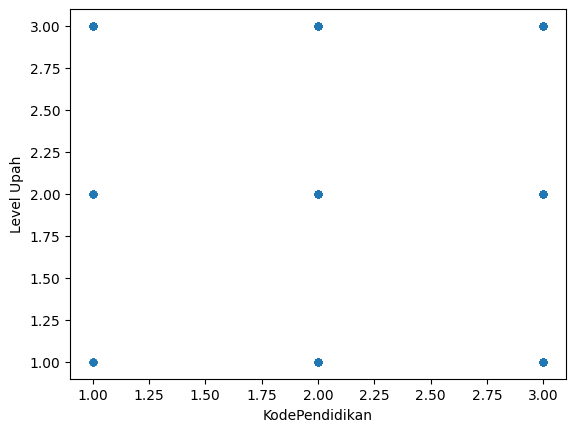

In [ ]:
data_hipo.plot(kind='scatter', x='KodePendidikan', y='Level Upah')

In [ ]:
x=data_hipo.iloc[:,:-1].values
y=data_hipo.iloc[:,1].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [ ]:
#Nilai A
print(regressor.intercept_)

2.298542443761917


In [ ]:
#Nilai B
print(regressor.coef_)

[0.1470503]


In [ ]:
regressor.score(x,y)

0.0197696578617087

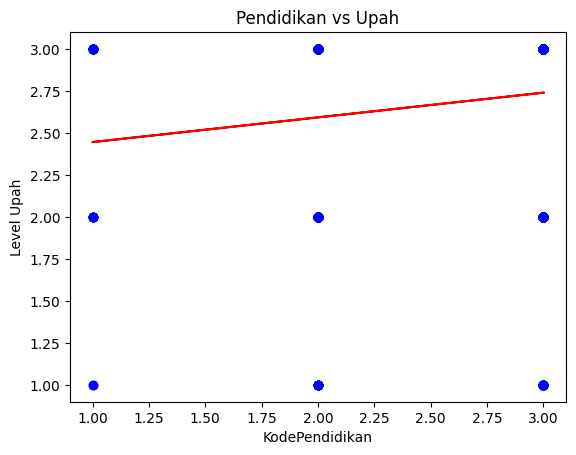

In [ ]:
plt.scatter(x_test,y_test, color = 'blue')
plt.plot(x_train,regressor.predict(x_train),color='red')
plt.title('Pendidikan vs Upah')
plt.xlabel('KodePendidikan')
plt.ylabel('Level Upah')
plt.show()

<Axes: xlabel='KodePendidikan', ylabel='Level Upah'>

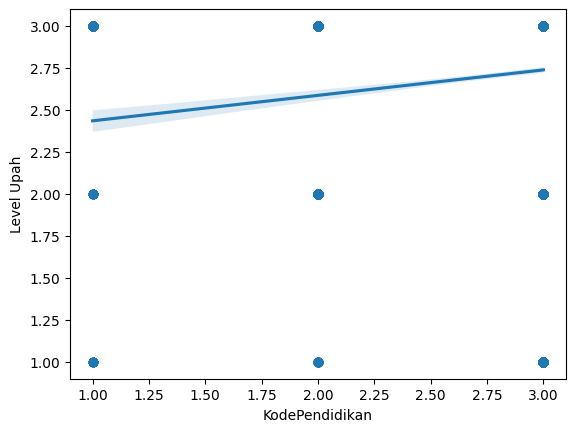

In [ ]:
sns.regplot(x='KodePendidikan',y='Level Upah',data=data_hipo)

KESIMPULAN

Persamaan Regresi Y = a + bX --> Y = 2.29 + 0,15X

a. 2.29 -> apabila variabel X (pendidikan) mempunyai nilai = 0 (tidak ada), maka variabel Y (Level Upah) mempunyai nilai = 2.29

b. 0.15 -> apabila setiap kenaikan variabel X (Pendidikan) sebesar 1, maka akan meningkatkan variabel Y (Level Upah) sebesar, 0.15, dengan konstanta 2.29 dan sebaliknya

c. nilai r square sebesar 0,02 menunjukkan kontribusi level pendidikan terhadap upah sebesar 2%, sisanya 98% dipengaruhi oleh faktor-faktor lain.